<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">P6-Analysez les ventes d'une librairie </h2>
</div>

<img src="Lapage.png">

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 25px; color:#fff; ">1.1-Ask </h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 25px; color:#fff; ">1.1.1-Definition du problème</h2>
</div>

<h2 style="margin: auto; padding: 25px; color:#fff; ">Vous intervenez car l’entreprise souhaite faire le point, analyser ses points forts, ses points faibles, les comportements clients, etc.</h2>
</div>



<h2 style="margin: auto; padding: 25px; color:#fff; ">Cela nous permettra de décider de la marche à suivre, par exemple décider si nous devons créer certaines offres, adapter certains prix, etc.</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 25px; color:#fff; ">1.1.2-Déroulement des analyses</h2>
</div>

<h2 style="margin: auto; padding: 25px; color:#fff; ">Cette analyse va être découpée en deux parties :


<h2 style="margin: auto; padding: 25px; color:#fff; ">
🚧-1️⃣-Une analyse des différents indicateurs de vente
</h2>
</div>


<h2 style="margin: auto; padding: 25px; color:#fff; ">
🚧-2️⃣-Une analyse plus ciblée sur les clients : l’objectif serait cette fois-ci de comprendre le comportement de nos clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via nos librairies physiques.
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 25px; color:#fff; ">1.1.3-Demande sur l'analyse des différents indicateurs de vente</h2>
</div>

<h2 style="margin: auto; padding: 25px; color:#fff; ">

🚧-Besoin de différents indicateurs et graphiques autour du chiffre d'affaires. 
</h2>
</div>

<h2 style="margin: auto; padding: 25px; color:#fff; ">

🚧-Regarder l’évolution dans le temps et mettre en place une
décomposition en moyenne mobile pour évaluer la tendance globale
</h2>


<h2 style="margin: auto; padding: 25px; color:#fff; ">

🚧-Faire un zoom sur les références, pour voir un peu les tops et les
flops, la répartition par catégorie, etc.
</h2>

<h2 style="margin: auto; padding: 25px; color:#fff; ">

🚧-Informations sur les profils de nos clients, et également la
répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.
</h2>

<h2 style="margin: auto; padding: 25px; color:#fff; ">

🚧-Après, toutes les informations et tous graphiques qui apporteraient de l’information pertinente
</h2>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 25px; color:#fff; ">1.1.4-Demande sur l'analyse des différents indicateurs de vente</h2>
</div>

<h2 style="margin: auto; padding: 25px; color:#fff; ">

🚧-Le lien entre le genre d’un client et les catégories des livres achetés
</h2>
</div>

<h2 style="margin: auto; padding: 25px; color:#fff; ">

🚧-Le lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés
</h2>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 25px; color:#fff; ">1.2-Prepare </h2>
</div>

In [2]:
#import des blibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import pandas as pd
import plotly.graph_objects as go

In [3]:
#customers 
datacu = pd.read_csv('H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 6   Analysez les ventes dune librairie avec R ou Python\DAN-P6-donnees\customers.csv',sep =",")
#product 
datapu = pd.read_csv('H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 6   Analysez les ventes dune librairie avec R ou Python\DAN-P6-donnees\products.csv',sep =",")
#transaction 
datatr = pd.read_csv('H:\Mon Drive\Data_Analyst_Florentin_Marrouard\Projet 6   Analysez les ventes dune librairie avec R ou Python\DAN-P6-donnees\\transactions.csv',sep =",")

In [4]:
#On cherche si il existe des valeurs anormales dans les données clients
datapu[datapu["id_prod"].isnull()==True]

,id_prod,price,categ


In [5]:
#on recherche les valeurs test dans transaction 
datatr[datatr["client_id"].str.contains("ct")!=False]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [6]:
#on retire les valeurs test dans le df trasaction
datatr = datatr[datatr["client_id"].str.contains("ct")==False].sort_values(by = 'date')

In [7]:
#On cherche si il existe des valeurs anormales dans le df datatr
datatr[datatr["id_prod"].isnull()!=False]

,id_prod,date,session_id,client_id


In [8]:
#check de l'age des clients
datacu.sort_values(by = 'birth')

,client_id,sex,birth
4569,c_577,m,1929
2491,c_8362,f,1929
418,c_5302,m,1929
1086,c_3218,f,1930
5138,c_7232,f,1930
...,...,...,...
7949,c_2053,f,2004
1130,c_1566,m,2004
5433,c_5436,f,2004
5642,c_5902,f,2004


In [9]:
#Check des valeurs des prix
datapu.sort_values(by = "price")

,id_prod,price,categ
731,T_0,-1.00,0
2355,0_202,0.62,0
2272,0_528,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [10]:
#Suppression des prix négatifs ou égal à 0 
datapu=datapu[datapu["price"]>=0].sort_values(by = 'price')
datapu

,id_prod,price,categ
2272,0_528,0.62,0
2355,0_202,0.62,0
370,0_120,0.66,0
1211,0_1844,0.77,0
1530,0_1620,0.80,0
...,...,...,...
2779,2_30,233.54,2
1436,2_167,236.99,2
394,2_158,247.22,2
724,2_76,254.44,2


In [ ]:
datapu['price']=round(datapu[['price']], 2)
datapu

In [11]:
#On fusionne ensuite le datatr avec datapu pour le calcul du chiffre d'affaire
dataca = pd.merge(datatr, datapu, on ='id_prod', how = "outer").sort_values(by="date")
dataca

,id_prod,date,session_id,client_id,price,categ
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0
341,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0
1221,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0
2225,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0
3290,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0
...,...,...,...,...,...,...
679348,0_1016,NaN,NaN,NaN,35.06,0.0
679349,1_394,NaN,NaN,NaN,39.73,1.0
679350,2_86,NaN,NaN,NaN,132.36,2.0
679351,2_72,NaN,NaN,NaN,141.32,2.0


In [12]:
#transactions sans les noms des clients
datapufalse=dataca[dataca["client_id"].isnull()==True]
datapufalse

,id_prod,date,session_id,client_id,price,categ
679332,0_1620,NaN,NaN,NaN,0.80,0.0
679333,0_1014,NaN,NaN,NaN,1.15,0.0
679334,0_1780,NaN,NaN,NaN,1.67,0.0
679335,0_310,NaN,NaN,NaN,1.94,0.0
679336,0_322,NaN,NaN,NaN,2.99,0.0
679337,0_1645,NaN,NaN,NaN,2.99,0.0
679338,0_1119,NaN,NaN,NaN,2.99,0.0
679339,0_1062,NaN,NaN,NaN,20.08,0.0
679340,0_2308,NaN,NaN,NaN,20.28,0.0
679341,0_1318,NaN,NaN,NaN,20.92,0.0


In [67]:
#Nous retirons les ventes sans nom de client et élimination des transactions sans prix 
dataca=dataca[dataca["client_id"].isnull()==False]
dataca[["price"]].sort_values('price')

,price
676995,0.62
676994,0.62
676998,0.62
676997,0.62
676999,0.62
...,...
616395,300.00
616391,300.00
616396,300.00
616392,300.00


In [68]:
dataca=dataca[dataca["price"].isnull()==False].sort_values('price')

Somme du CA avec la fonction .sum()  11853728.679999996
Somme du CA avec la fonction .cumsum()  11853728.680061668


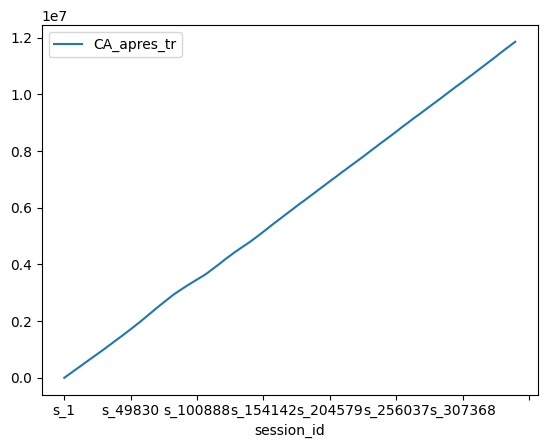

In [14]:
#premier tracé du CA dans le temps
dataca["CA_apres_tr"] = dataca["price"].cumsum()

CA=dataca[["CA_apres_tr","session_id"]]
CA.plot.line(y="CA_apres_tr", x='session_id')

print("Somme du CA avec la fonction .sum() ",dataca["price"].sum())
print("Somme du CA avec la fonction .cumsum() ",dataca["CA_apres_tr"].max())

data_rich <- data_ca 

In [70]:
#merge du datacu avec dataca
data_rich = pd.merge(dataca, datacu, on ='client_id', how = "outer").sort_values(by="date")
data_rich

,id_prod,date,session_id,client_id,price,categ,CA_apres_tr,sex,birth
447304,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,11.99,f,1967
281449,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,31.36,m,1960
448695,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,35.86,m,1988
238082,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,42.41,f,1989
583304,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,58.90,f,1956
...,...,...,...,...,...,...,...,...,...
679129,NaN,NaN,NaN,c_7584,NaN,NaN,NaN,f,1960
679130,NaN,NaN,NaN,c_90,NaN,NaN,NaN,m,2001
679131,NaN,NaN,NaN,c_587,NaN,NaN,NaN,m,1993
679132,NaN,NaN,NaN,ct_1,NaN,NaN,NaN,m,2001


In [ ]:
#dataca=dataca.merge(datacu, on= ["client_id"], how='outer')

# datapufalse=dataca[dataca["id_prod"].isnull()==True]
# datapufalse

# datatrfalse=dataca[dataca["client_id"].isnull()==True]
# datatrfalse

# dataca=dataca[dataca["id_prod"].isnull()==False]
# dataca

# dataci=dataca[["client_id","price"]].groupby('client_id').sum('price').sort_values(by = 'price').reindex()
# CA=dataci.sum()
# dataci["price"]=dataci["price"].cumsum()
# dataci["lorentz"]=dataci[["price"]]/CA
# dataci["ref"]=np.arange(len(dataci))/len(dataci)
# dataci

# dataci.plot.line(y=["lorentz","ref"], x=None)


# (dataci.sum()/dataci.count())['lorentz']

In [72]:
data_rich_false=data_rich[data_rich["id_prod"].isnull()==True]
data_rich_false

,id_prod,date,session_id,client_id,price,categ,CA_apres_tr,sex,birth
679111,NaN,NaN,NaN,c_8253,NaN,NaN,NaN,f,2001
679112,NaN,NaN,NaN,c_3789,NaN,NaN,NaN,f,1997
679113,NaN,NaN,NaN,c_4406,NaN,NaN,NaN,f,1998
679114,NaN,NaN,NaN,ct_0,NaN,NaN,NaN,f,2001
679115,NaN,NaN,NaN,c_2706,NaN,NaN,NaN,f,1967
679116,NaN,NaN,NaN,c_3443,NaN,NaN,NaN,m,1959
679117,NaN,NaN,NaN,c_4447,NaN,NaN,NaN,m,1956
679118,NaN,NaN,NaN,c_3017,NaN,NaN,NaN,f,1992
679119,NaN,NaN,NaN,c_4086,NaN,NaN,NaN,f,1992
679120,NaN,NaN,NaN,c_6930,NaN,NaN,NaN,m,2004


In [17]:
#Nous recuperons et filtrons les transactions sans produit 

In [18]:
data_rich_false=data_rich_false[data_rich_false["price"]>=0].sort_values(by = 'price')
data_rich_false

,id_prod,date,session_id,client_id,price,categ,CA_apres_tr,sex,birth


In [19]:
data_rich = data_rich[data_rich["price"]>=0].sort_values(by = 'client_id')
data_rich

,id_prod,date,session_id,client_id,price,categ,CA_apres_tr,sex,birth
666763,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,2.316945e+06,m,1955
666787,1_425,2022-06-25 03:53:43.623598,s_228867,c_1,16.99,1.0,7.756900e+06,m,1955
666765,0_1475,2021-07-27 10:30:00.293075,s_67769,c_1,11.99,0.0,2.345404e+06,m,1955
666791,0_1448,2022-07-26 17:37:29.438136,s_244105,c_1,18.94,0.0,8.279715e+06,m,1955
666795,0_513,2022-10-21 22:41:38.769525,s_286029,c_1,11.99,0.0,9.706569e+06,m,1955
...,...,...,...,...,...,...,...,...,...
673087,0_1426,2021-09-10 02:44:13.556163,s_87567,c_999,13.44,0.0,3.045362e+06,m,1964
673096,1_351,2021-11-21 17:16:06.807620,s_122996,c_999,28.99,1.0,4.079356e+06,m,1964
673120,1_381,2022-11-14 07:48:55.723362,s_297376,c_999,15.99,1.0,1.009487e+07,m,1964
673101,1_247,2022-01-24 09:39:50.831782,s_154462,c_999,20.99,1.0,5.165836e+06,m,1964


Coefficient de Gini :  0.3954702179593279


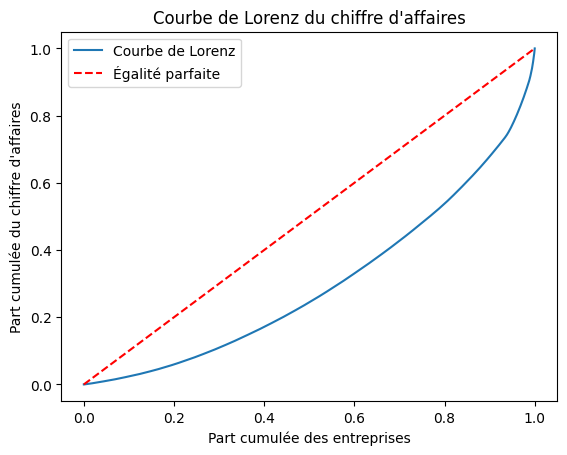

In [20]:
# Assurez-vous que votre tableau (arr) est trié du plus petit au plus grand !
arr = np.array([data_rich["price"].sort_values(ascending=True)])

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # Cela divise la somme cumulée par la somme totale
    # Cela garantit que toutes les valeurs sont comprises entre 0 et 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    
    # Cela ajoute la valeur 0 au début (parce que 0 % de toutes les personnes ont 0 % de la richesse totale)
    return np.insert(scaled_prefix_sum, 0, 0)

# Affiche l'indice de Gini !

print("Coefficient de Gini : ",gini(arr))

lorenz_curve = lorenz(arr)

# Nous devons avoir des valeurs de X comprises entre 0,0 et 1,0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve,label='Courbe de Lorenz')
# Trace la droite de l'égalité parfaite
plt.plot([0,1], [0,1], linestyle='--', color='red', label='Égalité parfaite')
plt.xlabel('Part cumulée des entreprises')
plt.ylabel('Part cumulée du chiffre d\'affaires')
plt.title('Courbe de Lorenz du chiffre d\'affaires')
plt.legend()
plt.show()

In [21]:
df_sex_categ = data_rich.loc[:, ['categ', 'sex']]
df_sex_categ

,categ,sex
666763,0.0,m
666787,1.0,m
666765,0.0,m
666791,0.0,m
666795,0.0,m
...,...,...
673087,0.0,m
673096,1.0,m
673120,1.0,m
673101,1.0,m


In [74]:

# Calculer les proportions des sexes par catégorie
proportions = df_sex_categ.groupby('categ')['sex'].value_counts(normalize=True).unstack()
# Renommer les colonnes
proportions.columns = ['F', 'M']

# Calculer le total par catégorie de livre
proportions['total'] = df_sex_categ.groupby('categ')['sex'].count()

# Réindexer le DataFrame
proportions = proportions.reindex(sorted(proportions.index))

# Afficher le DataFrame résultant
proportions

,F,M,total
categ,,,
0.0,0.496085,0.503915,415459
1.0,0.505786,0.494214,227169
2.0,0.473727,0.526273,36483


In [77]:
dataCL=data_rich

pd.crosstab(data_rich["sex"],data_rich["categ"])

categ,0.0,1.0,2.0
sex,,,
f,206103,114899,17283
m,209356,112270,19200


In [78]:
st.shapiro(pd.crosstab(data_rich["sex"],data_rich["categ"]))

ShapiroResult(statistic=0.8643549084663391, pvalue=0.20461510121822357)

In [80]:
#chi2 
from scipy.stats import chi2_contingency
chiVal, pVal, df, exp = chi2_contingency(pd.crosstab(data_rich["sex"],data_rich["categ"]))
chiVal, pVal, df, exp


(147.11906816131497,
 1.1310980597090762e-32,
 2,
 array([[206952.24759281, 113159.50583189,  18173.2465753 ],
        [208506.75240719, 114009.49416811,  18309.7534247 ]]))

In [81]:
chiVal, pVal, df, exp = chi2_contingency(pd.crosstab(data_rich["categ"],data_rich["sex"]))
chiVal, pVal, df, exp

(147.119068161315,
 1.1310980597090603e-32,
 2,
 array([[206952.24759281, 208506.75240719],
        [113159.50583189, 114009.49416811],
        [ 18173.2465753 ,  18309.7534247 ]]))

In [23]:
data_rich.columns

Index(['id_prod', 'date', 'session_id', 'client_id', 'price', 'categ',
       'CA_apres_tr', 'sex', 'birth'],
      dtype='object')

In [25]:
data_rich

,id_prod,date,session_id,client_id,price,categ,CA_apres_tr,sex,birth
666763,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,2.316945e+06,m,1955
666787,1_425,2022-06-25 03:53:43.623598,s_228867,c_1,16.99,1.0,7.756900e+06,m,1955
666765,0_1475,2021-07-27 10:30:00.293075,s_67769,c_1,11.99,0.0,2.345404e+06,m,1955
666791,0_1448,2022-07-26 17:37:29.438136,s_244105,c_1,18.94,0.0,8.279715e+06,m,1955
666795,0_513,2022-10-21 22:41:38.769525,s_286029,c_1,11.99,0.0,9.706569e+06,m,1955
...,...,...,...,...,...,...,...,...,...
673087,0_1426,2021-09-10 02:44:13.556163,s_87567,c_999,13.44,0.0,3.045362e+06,m,1964
673096,1_351,2021-11-21 17:16:06.807620,s_122996,c_999,28.99,1.0,4.079356e+06,m,1964
673120,1_381,2022-11-14 07:48:55.723362,s_297376,c_999,15.99,1.0,1.009487e+07,m,1964
673101,1_247,2022-01-24 09:39:50.831782,s_154462,c_999,20.99,1.0,5.165836e+06,m,1964


In [ ]:
# dataca['mois']=dataca['date'].dt.strftime("%Y-%m")
# dataca['annee']=dataca['date'].dt.strftime("%Y")
# dataca['time']=[d.time() for d in dataca['date']]
# dataca['date']=[d.date() for d in dataca['date']]
# dataca['age']=dataca['annee'].astype(int)-dataca['birth']
# dataca

# dataca['jour'] = pd.date_range('2021-03-01', '2023-03-01', freq='D').to_series().dt.dayofweek

# datacam=dataca[["mois","price","categ"]].groupby('mois').sum()
# datacam2=dataca[dataca["categ"]==2][["mois","price"]].groupby('mois').sum()
# datacam0=dataca[dataca["categ"]==0][["mois","price"]].groupby('mois').sum()
# datacam1=dataca[dataca["categ"]==1][["mois","price"]].groupby('mois').sum()
# datacacam=pd.merge(datacam0,datacam1, on= ["mois"], how='outer')
# datacacam=pd.merge(datacacam,datacam2, on= ["mois"], how='outer')
# datacacam.rename(columns = {'price_x':'CA0', 'price_y':'CA1', 'price':'CA2'}, inplace = True)
# datacacam.plot.bar(y=['CA0','CA1','CA2'], stacked=True, figsize=(25,10))

In [26]:
# Ajouter une colonne 'mois' représentant le mois
data_rich['mois'] = pd.to_datetime(data_rich['date']).dt.strftime('%Y-%-m')
data_rich['jour'] = pd.to_datetime(data_rich['date']).dt.strftime('%Y-%-m-%d')

data_rich

,id_prod,date,session_id,client_id,price,categ,CA_apres_tr,sex,birth,mois,jour
666763,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,2.316945e+06,m,1955,2021-07-25 12:17:34.446678,2021-07-25 12:17:34.446678
666787,1_425,2022-06-25 03:53:43.623598,s_228867,c_1,16.99,1.0,7.756900e+06,m,1955,2022-06-25 03:53:43.623598,2022-06-25 03:53:43.623598
666765,0_1475,2021-07-27 10:30:00.293075,s_67769,c_1,11.99,0.0,2.345404e+06,m,1955,2021-07-27 10:30:00.293075,2021-07-27 10:30:00.293075
666791,0_1448,2022-07-26 17:37:29.438136,s_244105,c_1,18.94,0.0,8.279715e+06,m,1955,2022-07-26 17:37:29.438136,2022-07-26 17:37:29.438136
666795,0_513,2022-10-21 22:41:38.769525,s_286029,c_1,11.99,0.0,9.706569e+06,m,1955,2022-10-21 22:41:38.769525,2022-10-21 22:41:38.769525
...,...,...,...,...,...,...,...,...,...,...,...
673087,0_1426,2021-09-10 02:44:13.556163,s_87567,c_999,13.44,0.0,3.045362e+06,m,1964,2021-09-10 02:44:13.556163,2021-09-10 02:44:13.556163
673096,1_351,2021-11-21 17:16:06.807620,s_122996,c_999,28.99,1.0,4.079356e+06,m,1964,2021-11-21 17:16:06.807620,2021-11-21 17:16:06.807620
673120,1_381,2022-11-14 07:48:55.723362,s_297376,c_999,15.99,1.0,1.009487e+07,m,1964,2022-11-14 07:48:55.723362,2022-11-14 07:48:55.723362
673101,1_247,2022-01-24 09:39:50.831782,s_154462,c_999,20.99,1.0,5.165836e+06,m,1964,2022-01-24 09:39:50.831782,2022-01-24 09:39:50.831782


In [27]:
# Convertir la colonne 'date' en type de données de date/heure
data_rich['date'] = pd.to_datetime(data_rich['date'])

# Extraire uniquement la date (supprimer l'heure)
data_rich['jour'] = data_rich['date'].dt.date
data_rich['mois'] = data_rich['date'].dt.strftime('%Y-%m')

# Afficher le DataFrame résultant
data_rich


,id_prod,date,session_id,client_id,price,categ,CA_apres_tr,sex,birth,mois,jour
666763,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,2.316945e+06,m,1955,2021-07,2021-07-25
666787,1_425,2022-06-25 03:53:43.623598,s_228867,c_1,16.99,1.0,7.756900e+06,m,1955,2022-06,2022-06-25
666765,0_1475,2021-07-27 10:30:00.293075,s_67769,c_1,11.99,0.0,2.345404e+06,m,1955,2021-07,2021-07-27
666791,0_1448,2022-07-26 17:37:29.438136,s_244105,c_1,18.94,0.0,8.279715e+06,m,1955,2022-07,2022-07-26
666795,0_513,2022-10-21 22:41:38.769525,s_286029,c_1,11.99,0.0,9.706569e+06,m,1955,2022-10,2022-10-21
...,...,...,...,...,...,...,...,...,...,...,...
673087,0_1426,2021-09-10 02:44:13.556163,s_87567,c_999,13.44,0.0,3.045362e+06,m,1964,2021-09,2021-09-10
673096,1_351,2021-11-21 17:16:06.807620,s_122996,c_999,28.99,1.0,4.079356e+06,m,1964,2021-11,2021-11-21
673120,1_381,2022-11-14 07:48:55.723362,s_297376,c_999,15.99,1.0,1.009487e+07,m,1964,2022-11,2022-11-14
673101,1_247,2022-01-24 09:39:50.831782,s_154462,c_999,20.99,1.0,5.165836e+06,m,1964,2022-01,2022-01-24


In [28]:
grouped_data_mois = data_rich.groupby(['mois', 'categ'])['price'].sum().reset_index()
grouped_data_mois

,mois,categ,price
0,2021-03,0.0,193629.17
1,2021-03,1.0,186974.17
2,2021-03,2.0,101837.27
3,2021-04,0.0,205222.46
4,2021-04,1.0,156138.35
...,...,...,...
67,2023-01,1.0,210104.41
68,2023-01,2.0,126153.08
69,2023-02,0.0,162457.00
70,2023-02,1.0,180347.24


In [29]:
grouped_data_jour = data_rich.groupby(['jour', 'categ'])['price'].sum().reset_index()
grouped_data_jour

,jour,categ,price
0,2021-03-01,0.0,6262.65
1,2021-03-01,1.0,6811.53
2,2021-03-01,2.0,3491.04
3,2021-03-02,0.0,6718.27
4,2021-03-02,1.0,5627.15
...,...,...,...
2159,2023-02-27,1.0,6461.76
2160,2023-02-27,2.0,5271.62
2161,2023-02-28,0.0,4901.86
2162,2023-02-28,1.0,9226.25


In [30]:
data_rich["categ"].value_counts()

0.0    415459
1.0    227169
2.0     36483
Name: categ, dtype: int64

In [31]:
data_ca_categ = data_rich.groupby(['mois', 'categ']).sum().reset_index()
data_ca_categ

C:\Users\flore\AppData\Local\Temp\ipykernel_14604\2661109013.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_ca_categ = data_rich.groupby(['mois', 'categ']).sum().reset_index()


,mois,categ,price,CA_apres_tr,birth
0,2021-03,0.0,193629.17,4.346551e+09,35866261
1,2021-03,1.0,186974.17,2.211590e+09,18035620
2,2021-03,2.0,101837.27,3.236539e+08,2666359
3,2021-04,0.0,205222.46,1.401177e+10,38263081
4,2021-04,1.0,156138.35,5.416004e+09,14962506
...,...,...,...,...,...
67,2023-01,1.0,210104.41,1.141226e+11,20240270
68,2023-01,2.0,126153.08,1.802422e+10,3230609
69,2023-02,0.0,162457.00,1.773608e+11,30174402
70,2023-02,1.0,180347.24,1.022085e+11,17353680


<Figure size 2000x600 with 0 Axes>

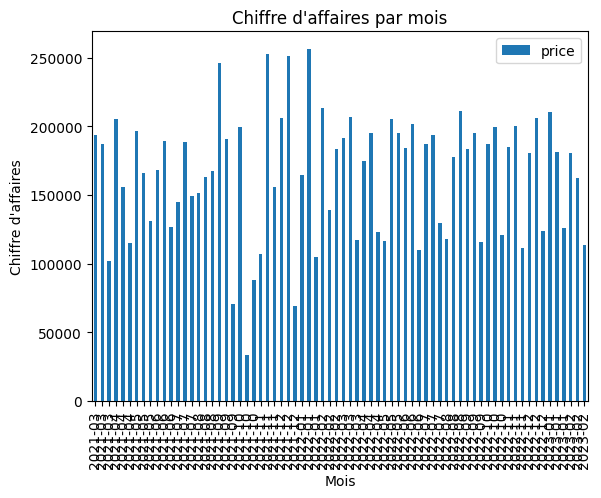

In [96]:
# Trier les mois en ordre croissant
data_ca_categ = data_ca_categ.sort_values('mois')


# datacacam.plot.bar(y=['CA0','CA1','CA2'], stacked=True, figsize=(25,10))

# Définir la taille de la figure
plt.figure(figsize=(20, 6)) 
data_ca_categ.plot.bar(
            x='mois',
            y='price')

# Ajouter des titres et des étiquettes aux axes
plt.title("Chiffre d'affaires par mois")
plt.xlabel('Mois')
plt.ylabel("Chiffre d'affaires")

# Afficher l'histogramme
plt.show()

In [33]:
chiffre_affaires_mensuel = grouped_data_mois.groupby(grouped_data_mois['mois'])['price'].sum().reset_index(name='chiffre_affaires')
chiffre_affaires_mensuel

,mois,chiffre_affaires
0,2021-03,482440.61
1,2021-04,476109.30
2,2021-05,492943.47
3,2021-06,484088.56
4,2021-07,482835.40
5,2021-08,482284.79
6,2021-09,507240.68
7,2021-10,320798.74
8,2021-11,516167.73
9,2021-12,525917.28


In [34]:
chiffre_affaires_jour = grouped_data_jour.groupby(grouped_data_jour['jour'])['price'].sum().reset_index(name='chiffre_affaires')
chiffre_affaires_jour

,jour,chiffre_affaires
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


In [35]:
ventes_mensuelles = data_rich.groupby([data_rich['mois'], data_rich['categ']])['session_id'].count().reset_index(name='ventes')
ventes_mensuelles

,mois,categ,ventes
0,2021-03,0.0,18131
1,2021-03,1.0,9134
2,2021-03,2.0,1336
3,2021-04,0.0,19342
4,2021-04,1.0,7579
...,...,...,...
67,2023-01,1.0,10252
68,2023-01,2.0,1618
69,2023-02,0.0,15255
70,2023-02,1.0,8789


In [36]:
ventes_jour= data_rich.groupby([data_rich['jour'], data_rich['categ']])['session_id'].count().reset_index(name='ventes')
ventes_jour

,jour,categ,ventes
0,2021-03-01,0.0,581
1,2021-03-01,1.0,335
2,2021-03-01,2.0,46
3,2021-03-02,0.0,620
4,2021-03-02,1.0,276
...,...,...,...
2159,2023-02-27,1.0,332
2160,2023-02-27,2.0,75
2161,2023-02-28,0.0,472
2162,2023-02-28,1.0,439


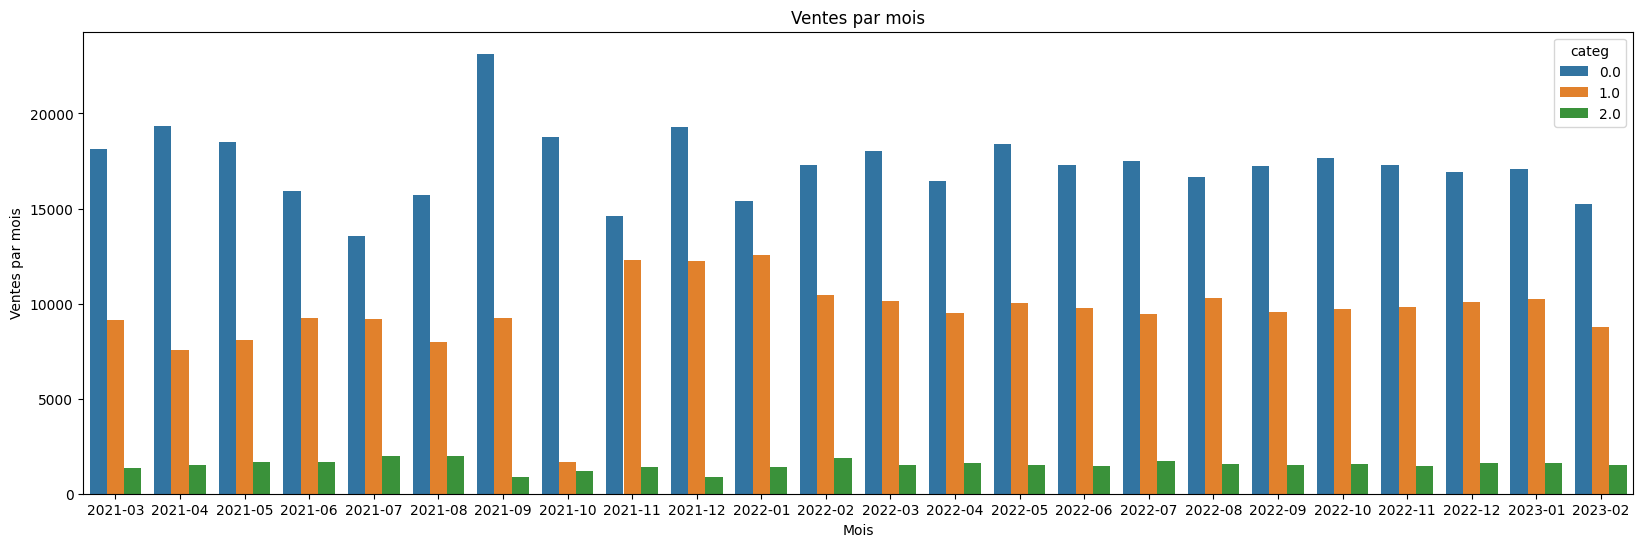

In [37]:
# Trier les mois en ordre croissant
ventes_mensuelles = ventes_mensuelles.sort_values('mois')

# Définir la taille de la figure
plt.figure(figsize=(20, 6)) 
sns.barplot(data=ventes_mensuelles, x='mois', y='ventes', hue='categ')

# Ajouter des titres et des étiquettes aux axes
plt.title("Ventes par mois")
plt.xlabel('Mois')
plt.ylabel("Ventes par mois")

# Afficher l'histogramme
plt.show()

In [38]:
ventes_jour

,jour,categ,ventes
0,2021-03-01,0.0,581
1,2021-03-01,1.0,335
2,2021-03-01,2.0,46
3,2021-03-02,0.0,620
4,2021-03-02,1.0,276
...,...,...,...
2159,2023-02-27,1.0,332
2160,2023-02-27,2.0,75
2161,2023-02-28,0.0,472
2162,2023-02-28,1.0,439


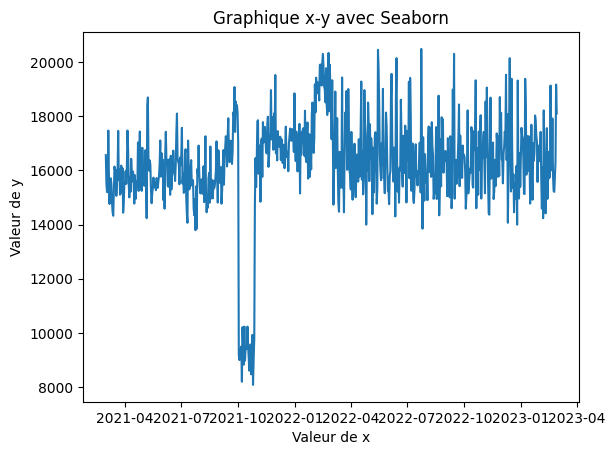

In [39]:
# Créer le graphique x-y avec seaborn
sns.lineplot(x=chiffre_affaires_jour["jour"],
                y=chiffre_affaires_jour["chiffre_affaires"])

# Ajouter des titres et des étiquettes aux axes
plt.title("Graphique x-y avec Seaborn")
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")

# Afficher le graphique
plt.show()


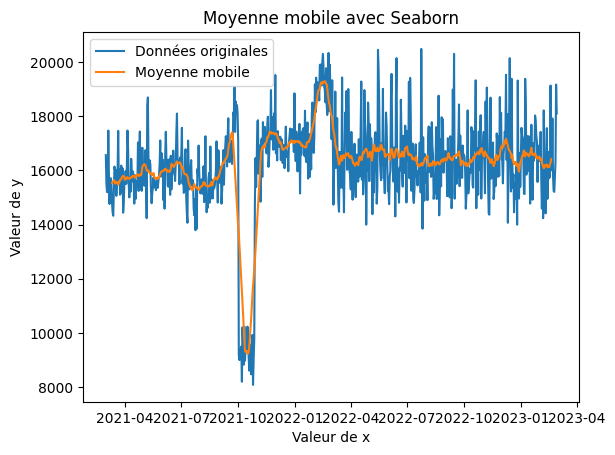

In [40]:

# Créer des données de test
x = chiffre_affaires_jour["jour"]
y = chiffre_affaires_jour["chiffre_affaires"]

# Créer une fenêtre de moyenne mobile de taille 5
window_size = 20
y_smooth = pd.Series(y).rolling(window_size, center=True).mean()

# Créer le graphique avec Seaborn
sns.lineplot(x=x, y=y, label='Données originales')
sns.lineplot(x=x, y=y_smooth, label='Moyenne mobile')

# Ajouter des titres et des étiquettes aux axes
plt.title("Moyenne mobile avec Seaborn")
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")

# Afficher le graphique
plt.show()


In [41]:
chiffre_affaires_jour

,jour,chiffre_affaires
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


In [42]:
# Filtrage des dates dans le DataFrame
chiffre_affaires_jour['jour'] = pd.to_datetime(chiffre_affaires_jour['jour'])  # Conversion de la colonne 'jour' en type datetime si nécessaire
chiffre_affaires_jour_filtered = chiffre_affaires_jour[
    (chiffre_affaires_jour['jour'] < pd.to_datetime('2021-10-01')) | 
    (chiffre_affaires_jour['jour'] > pd.to_datetime('2021-10-31'))
]

# Affichage du DataFrame filtré
chiffre_affaires_jour_filtered



,jour,chiffre_affaires
0,2021-03-01,16565.22
1,2021-03-02,15486.45
2,2021-03-03,15198.69
3,2021-03-04,15196.07
4,2021-03-05,17471.37
...,...,...
725,2023-02-24,15207.89
726,2023-02-25,15761.25
727,2023-02-26,16304.72
728,2023-02-27,19170.81


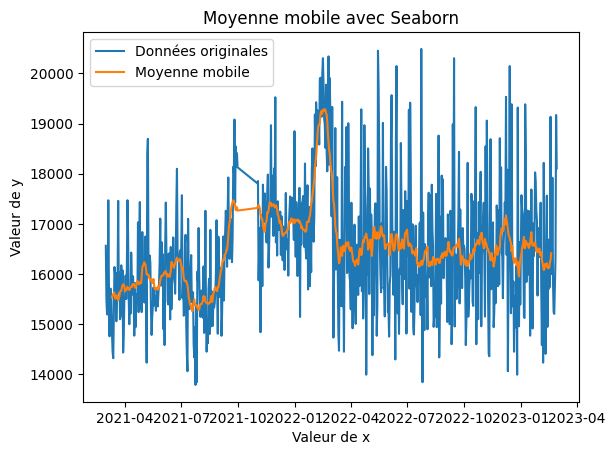

In [43]:

# Créer des données de test
x = chiffre_affaires_jour_filtered["jour"]
y = chiffre_affaires_jour_filtered["chiffre_affaires"]

# Créer une fenêtre de moyenne mobile de taille 5
window_size = 20
y_smooth = pd.Series(y).rolling(window_size, center=True).mean()

# Créer le graphique avec Seaborn
sns.lineplot(x=x, y=y, label='Données originales')
sns.lineplot(x=x, y=y_smooth, label='Moyenne mobile')

# Ajouter des titres et des étiquettes aux axes
plt.title("Moyenne mobile avec Seaborn")
plt.xlabel("Valeur de x")
plt.ylabel("Valeur de y")

# Afficher le graphique
plt.show()

In [44]:
data_rich

,id_prod,date,session_id,client_id,price,categ,CA_apres_tr,sex,birth,mois,jour
666763,0_1186,2021-07-25 12:17:34.446678,s_66947,c_1,12.30,0.0,2.316945e+06,m,1955,2021-07,2021-07-25
666787,1_425,2022-06-25 03:53:43.623598,s_228867,c_1,16.99,1.0,7.756900e+06,m,1955,2022-06,2022-06-25
666765,0_1475,2021-07-27 10:30:00.293075,s_67769,c_1,11.99,0.0,2.345404e+06,m,1955,2021-07,2021-07-27
666791,0_1448,2022-07-26 17:37:29.438136,s_244105,c_1,18.94,0.0,8.279715e+06,m,1955,2022-07,2022-07-26
666795,0_513,2022-10-21 22:41:38.769525,s_286029,c_1,11.99,0.0,9.706569e+06,m,1955,2022-10,2022-10-21
...,...,...,...,...,...,...,...,...,...,...,...
673087,0_1426,2021-09-10 02:44:13.556163,s_87567,c_999,13.44,0.0,3.045362e+06,m,1964,2021-09,2021-09-10
673096,1_351,2021-11-21 17:16:06.807620,s_122996,c_999,28.99,1.0,4.079356e+06,m,1964,2021-11,2021-11-21
673120,1_381,2022-11-14 07:48:55.723362,s_297376,c_999,15.99,1.0,1.009487e+07,m,1964,2022-11,2022-11-14
673101,1_247,2022-01-24 09:39:50.831782,s_154462,c_999,20.99,1.0,5.165836e+06,m,1964,2022-01,2022-01-24


In [45]:
# Calcul du nombre de fois que chaque id_prod apparaît
id_prod_counts = data_rich['id_prod'].value_counts()

# Classement par ordre croissant
id_prod_counts_sorted = id_prod_counts.sort_values()

# Affichage du résultat
id_prod_counts_sorted.head(25)


0_1539    1
2_98      1
0_1498    1
0_807     1
0_833     1
0_1284    1
0_1633    1
0_549     1
0_1151    1
0_1728    1
2_23      1
0_1379    1
0_1683    1
0_541     1
0_2201    1
0_1601    1
0_886     1
2_81      1
0_1279    2
0_1215    2
0_453     2
0_495     2
0_1902    2
1_420     2
0_1116    2
Name: id_prod, dtype: int64

In [64]:
chiffre_affaires_jour_filtered["jour"] = pd.to_datetime(chiffre_affaires_jour_filtered["jour"])
chiffre_affaires_jour_filtered["jour_semaine"] = chiffre_affaires_jour_filtered["jour"].dt.weekday

chiffre_affaires_jour_filtered["jour_semaine"]


C:\Users\flore\AppData\Local\Temp\ipykernel_14604\3477995567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chiffre_affaires_jour_filtered["jour"] = pd.to_datetime(chiffre_affaires_jour_filtered["jour"])
C:\Users\flore\AppData\Local\Temp\ipykernel_14604\3477995567.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chiffre_affaires_jour_filtered["jour_semaine"] = chiffre_affaires_jour_filtered["jour"].dt.weekday


0      0
1      1
2      2
3      3
4      4
      ..
725    4
726    5
727    6
728    0
729    1
Name: jour_semaine, Length: 699, dtype: int64

In [65]:
chiffre_affaires_jour_filtered

,jour,chiffre_affaires,jour_semaine
0,2021-03-01,16565.22,0
1,2021-03-02,15486.45,1
2,2021-03-03,15198.69,2
3,2021-03-04,15196.07,3
4,2021-03-05,17471.37,4
...,...,...,...
725,2023-02-24,15207.89,4
726,2023-02-25,15761.25,5
727,2023-02-26,16304.72,6
728,2023-02-27,19170.81,0


<AxesSubplot: xlabel='jour_semaine', ylabel='chiffre_affaires'>

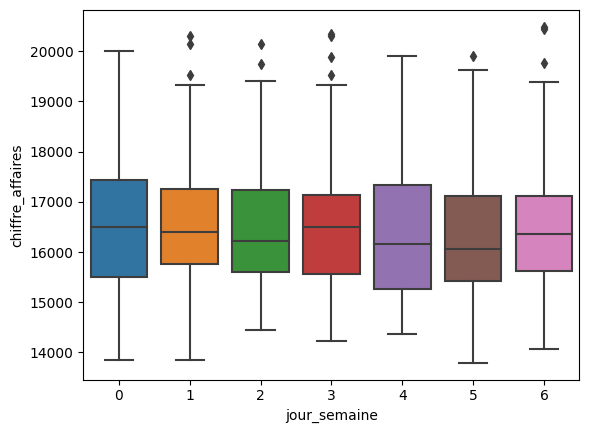

In [66]:
sns.boxplot(data=chiffre_affaires_jour_filtered, x='jour_semaine', y="chiffre_affaires")